# **SEL-NNML Training Visualization - Dataset 1**

This notebook contains visualizations for the SEL-NNML training process, including:
- Training convergence across different samplers (TPE, GP, CMA-ES, QMC)
- Training time comparisons (future)
- Other performance metrics

## 1. Import Libraries

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.signal import savgol_filter

## 2. Load Training Histories

In [71]:
# Ensure files exist and load them
base_path = '../artifacts/ds1/models'
files = {
    'TPE': os.path.join(base_path, 'tpe', 'sel-nnml_training_history.csv'),
    'GP': os.path.join(base_path, 'gp', 'sel-nnml_training_history.csv'),
    'CMA-ES': os.path.join(base_path, 'cmaes', 'sel-nnml_training_history.csv'),
    'QMC': os.path.join(base_path, 'qmc', 'sel-nnml_training_history.csv')
}
for k, p in files.items():
    if not os.path.exists(p):
        raise FileNotFoundError(f"Training history file not found: {p} - run the main notebook with SKIP_TRAINING=False or place the CSVs in the artifacts folder.")

tpe_history = pd.read_csv(files['TPE'])
gp_history = pd.read_csv(files['GP'])
cmaes_history = pd.read_csv(files['CMA-ES'])
qmc_history = pd.read_csv(files['QMC'])

print('Training histories loaded successfully!')
print(f"TPE: {tpe_history.shape}, GP: {gp_history.shape}, CMA-ES: {cmaes_history.shape}, QMC: {qmc_history.shape}")

Training histories loaded successfully!
TPE: (100, 2), GP: (100, 2), CMA-ES: (100, 2), QMC: (100, 2)


## 3. Single Multi-line Convergence Chart

This chart shows the cumulative best score over iterations for each sampler on a single plot (4 lines).

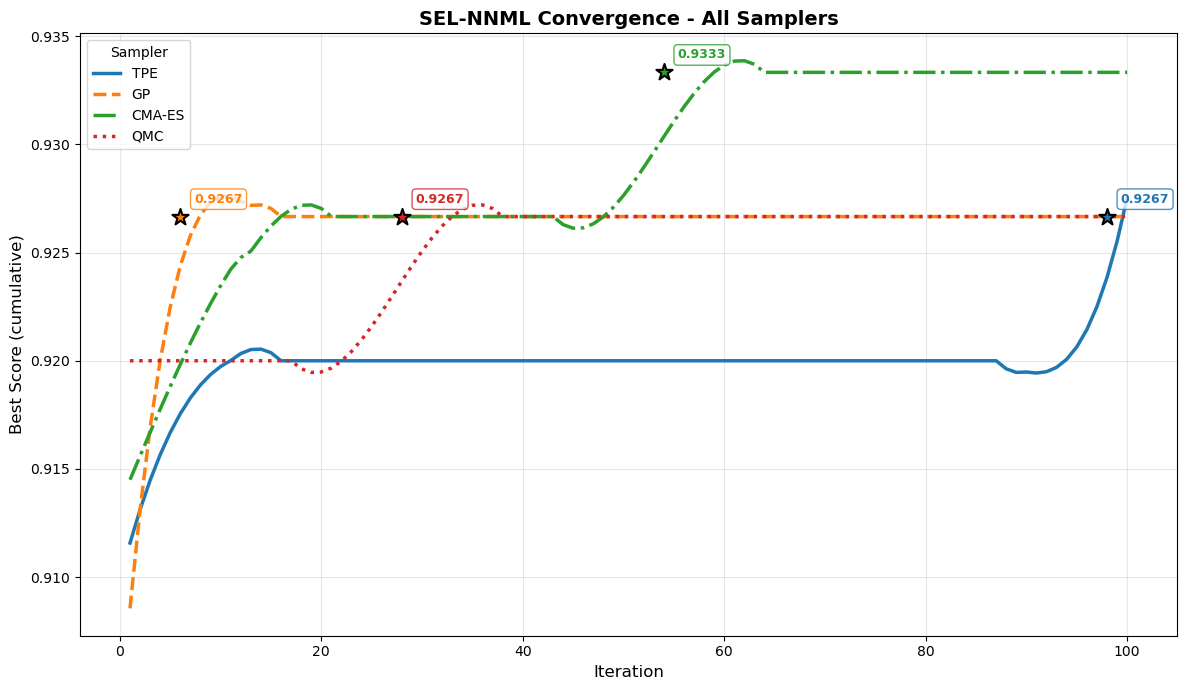

In [72]:
plt.figure(figsize=(12, 7))

samplers = [
    ('TPE', tpe_history, '#1f77b4', '-'),        # solid
    ('GP', gp_history, '#ff7f0e', '--'),         # dashed
    ('CMA-ES', cmaes_history, '#2ca02c', '-.'),  # dash-dot
    ('QMC', qmc_history, '#d62728', ':'),        # dotted
]

for name, df, color, linestyle in samplers:
    # Expect df with columns ['iteration','score']
    if 'iteration' not in df.columns or 'score' not in df.columns:
        raise ValueError(f"Expected columns 'iteration' and 'score' in {name} history CSV")

    # Calculate cumulative best
    cumulative_best = df['score'].cummax()
    x = df['iteration'].values
    y = cumulative_best.values
    
    # Apply Savitzky-Golay smoothing
    window_length = min(21, len(y) if len(y) % 2 == 1 else len(y) - 1)
    y_smooth = savgol_filter(y, window_length, 3)
    
    # Plot smooth line with distinct line style
    plt.plot(x, y_smooth, label=name, color=color, linewidth=2.5, linestyle=linestyle)
    
    # Highlight peak score
    peak_score = y.max()
    peak_iteration = x[y.argmax()]
    plt.scatter(peak_iteration, peak_score, color=color, s=150, marker='*', 
                edgecolors='black', linewidths=1.5, zorder=5)
    plt.annotate(f'{peak_score:.4f}', 
                xy=(peak_iteration, peak_score),
                xytext=(10, 10), textcoords='offset points',
                fontsize=9, color=color, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor=color, alpha=0.8))

plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Best Score (cumulative)', fontsize=12)
plt.title('SEL-NNML Convergence - All Samplers', fontsize=14, fontweight='bold')
plt.legend(title='Sampler', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 4. Save Plot (optional)

In [73]:
out_dir = '../artifacts/ds1/visualizations'
os.makedirs(out_dir, exist_ok=True)
plt.figure(figsize=(12, 7))

for name, df, color, linestyle in samplers:
    # Calculate cumulative best
    cumulative_best = df['score'].cummax()
    x = df['iteration'].values
    y = cumulative_best.values
    
    # Apply Savitzky-Golay smoothing
    window_length = min(21, len(y) if len(y) % 2 == 1 else len(y) - 1)
    y_smooth = savgol_filter(y, window_length, 3)
    
    # Plot smooth line with distinct line style
    plt.plot(x, y_smooth, label=name, color=color, linewidth=2.5, linestyle=linestyle)
    
    # Highlight peak score
    peak_score = y.max()
    peak_iteration = x[y.argmax()]
    plt.scatter(peak_iteration, peak_score, color=color, s=150, marker='*', 
                edgecolors='black', linewidths=1.5, zorder=5)
    plt.annotate(f'{peak_score:.4f}', 
                xy=(peak_iteration, peak_score),
                xytext=(10, 10), textcoords='offset points',
                fontsize=9, color=color, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor=color, alpha=0.8))

plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Best Score (cumulative)', fontsize=12)
plt.title('SEL-NNML Convergence - All Samplers', fontsize=14, fontweight='bold')
plt.legend(title='Sampler', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
out_path = os.path.join(out_dir, 'sel_nnml_convergence_all_samplers.png')
plt.savefig(out_path, dpi=300, bbox_inches='tight')
print(f'Convergence plot saved to: {out_path}')
plt.close()

Convergence plot saved to: ../artifacts/ds1/visualizations/sel_nnml_convergence_all_samplers.png


## 5. Training Time Comparison

This section compares the training times across different optimization samplers for both base learners and meta learners.

In [74]:
# Load training times
times_path = '../artifacts/ds1/models/training_times.csv'
if not os.path.exists(times_path):
    raise FileNotFoundError(f"Training times file not found: {times_path}")

times_df = pd.read_csv(times_path)
print("Training Times Loaded:")
print(times_df)

Training Times Loaded:
  Sampler  Base Models Training Time (seconds)  \
0     TPE                            93.051321   
1      GP                           256.697985   
2  CMA-ES                            90.717578   
3     QMC                            87.806745   

   Meta Model Training Time (seconds)  Total Training Time (seconds)  
0                          161.484864                     254.536186  
1                          132.536662                     389.234648  
2                          131.479055                     222.196633  
3                          150.151966                     237.958711  


### 5.1 Training Time Summary Table

In [75]:
# Convert seconds to hours for better readability
def seconds_to_hours(seconds):
    hours = seconds / 3600
    if hours < 0.01:
        # Show minutes if less than 0.01 hours
        minutes = seconds / 60
        return f"{minutes:.2f} min"
    return f"{hours:.4f} hrs"

# Create formatted table
table_data = []
for _, row in times_df.iterrows():
    table_data.append({
        'Method': row['Sampler'],
        'Base Learner Time': seconds_to_hours(row['Base Models Training Time (seconds)']),
        'Meta Learner Time': seconds_to_hours(row['Meta Model Training Time (seconds)']),
        'Total Time': seconds_to_hours(row['Total Training Time (seconds)'])
    })

summary_table = pd.DataFrame(table_data)
print("\n" + "="*80)
print("TRAINING TIME COMPARISON - SEL-NNML")
print("="*80)
print(summary_table.to_string(index=False))
print("="*80)


TRAINING TIME COMPARISON - SEL-NNML
Method Base Learner Time Meta Learner Time Total Time
   TPE        0.0258 hrs        0.0449 hrs 0.0707 hrs
    GP        0.0713 hrs        0.0368 hrs 0.1081 hrs
CMA-ES        0.0252 hrs        0.0365 hrs 0.0617 hrs
   QMC        0.0244 hrs        0.0417 hrs 0.0661 hrs


### 5.2 Training Time Visualization

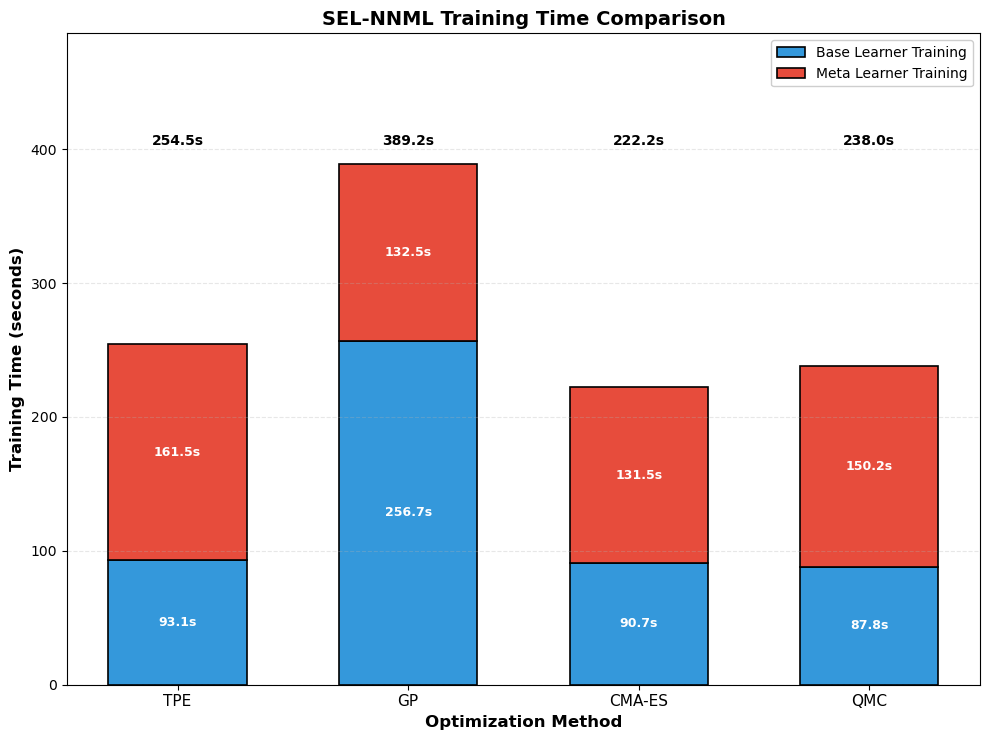

In [76]:
# Create stacked bar chart for training times
fig, ax = plt.subplots(figsize=(10, 7.5))

samplers_list = times_df['Sampler'].values
base_times = times_df['Base Models Training Time (seconds)'].values  # Keep in seconds
meta_times = times_df['Meta Model Training Time (seconds)'].values

x = np.arange(len(samplers_list))
width = 0.6

# Create stacked bars
bars1 = ax.bar(x, base_times, width, label='Base Learner Training', color='#3498db', edgecolor='black', linewidth=1.2)
bars2 = ax.bar(x, meta_times, width, bottom=base_times, label='Meta Learner Training', color='#e74c3c', edgecolor='black', linewidth=1.2)

# Calculate max height for consistent label positioning
max_total = (base_times + meta_times).max()
label_offset = max_total * 0.03  # 3% offset from top

# Add value labels on bars
for i, (b, m) in enumerate(zip(base_times, meta_times)):
    total = b + m
    # Base learner time
    ax.text(i, b/2, f'{b:.1f}s', ha='center', va='center', fontweight='bold', fontsize=9, color='white')
    # Meta learner time
    ax.text(i, b + m/2, f'{m:.1f}s', ha='center', va='center', fontweight='bold', fontsize=9, color='white')
    # Total time on top - aligned consistently
    ax.text(i, max_total + label_offset, f'{total:.1f}s', ha='center', va='bottom', fontweight='bold', fontsize=10)

ax.set_xlabel('Optimization Method', fontsize=12, fontweight='bold')
ax.set_ylabel('Training Time (seconds)', fontsize=12, fontweight='bold')
ax.set_title('SEL-NNML Training Time Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(samplers_list, fontsize=11)
ax.legend(fontsize=10, loc='upper right', framealpha=0.95)
ax.grid(axis='y', alpha=0.3, linestyle='--')
# Add more padding at the top for labels
ax.set_ylim(0, max_total * 1.25)

plt.tight_layout()
plt.show()

In [77]:
# Save the training time plot
plt.figure(figsize=(10, 7.5))

samplers_list = times_df['Sampler'].values
base_times = times_df['Base Models Training Time (seconds)'].values  # Keep in seconds
meta_times = times_df['Meta Model Training Time (seconds)'].values

x = np.arange(len(samplers_list))
width = 0.6

bars1 = plt.bar(x, base_times, width, label='Base Learner Training', color='#3498db', edgecolor='black', linewidth=1.2)
bars2 = plt.bar(x, meta_times, width, bottom=base_times, label='Meta Learner Training', color='#e74c3c', edgecolor='black', linewidth=1.2)

# Calculate max height for consistent label positioning
max_total = (base_times + meta_times).max()
label_offset = max_total * 0.03

for i, (b, m) in enumerate(zip(base_times, meta_times)):
    total = b + m
    plt.text(i, b/2, f'{b:.1f}s', ha='center', va='center', fontweight='bold', fontsize=9, color='white')
    plt.text(i, b + m/2, f'{m:.1f}s', ha='center', va='center', fontweight='bold', fontsize=9, color='white')
    plt.text(i, max_total + label_offset, f'{total:.1f}s', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.xlabel('Optimization Method', fontsize=12, fontweight='bold')
plt.ylabel('Training Time (seconds)', fontsize=12, fontweight='bold')
plt.title('SEL-NNML Training Time Comparison', fontsize=14, fontweight='bold')
plt.xticks(x, samplers_list, fontsize=11)
plt.legend(fontsize=10, loc='upper right', framealpha=0.95)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.ylim(0, max_total * 1.25)
plt.tight_layout()

time_plot_path = os.path.join(out_dir, 'sel_nnml_training_times.png')
plt.savefig(time_plot_path, dpi=300, bbox_inches='tight')
print(f'Training time plot saved to: {time_plot_path}')
plt.close()

Training time plot saved to: ../artifacts/ds1/visualizations/sel_nnml_training_times.png
